In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [54]:
df1 = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col='Date', parse_dates=True)

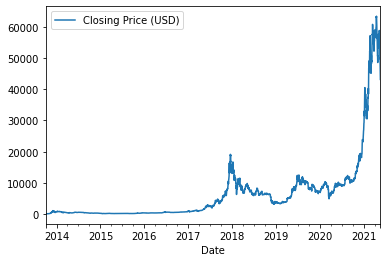

In [55]:
df = df1[['Closing Price (USD)']].copy().dropna()
df.plot();

In [56]:
adfuller(df['Closing Price (USD)'])

(-0.4817897581592866,
 0.8955213820284769,
 28,
 2758,
 {'1%': -3.432723240296268,
  '5%': -2.862588528076247,
  '10%': -2.567328164790305},
 42319.200720074296)

In [57]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [58]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [59]:
adf(df['Closing Price (USD)'])

Test-Statistic: -0.4817897581592866
P-Value: 0.8955213820284769
Non-Stationary


In [60]:
adf(np.random.randn(100))

Test-Statistic: -9.784699188438813
P-Value: 6.590856162820485e-17
Stationary


In [61]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic: -5.981139473390669
P-Value: 1.8373375495923898e-07
Stationary


In [62]:
df['LogClosing Price (USD)'] = np.log(df['Closing Price (USD)'])

Text(0.5, 1.0, 'log P-Value: 0.8235594918592399 result-Non-Stationary')

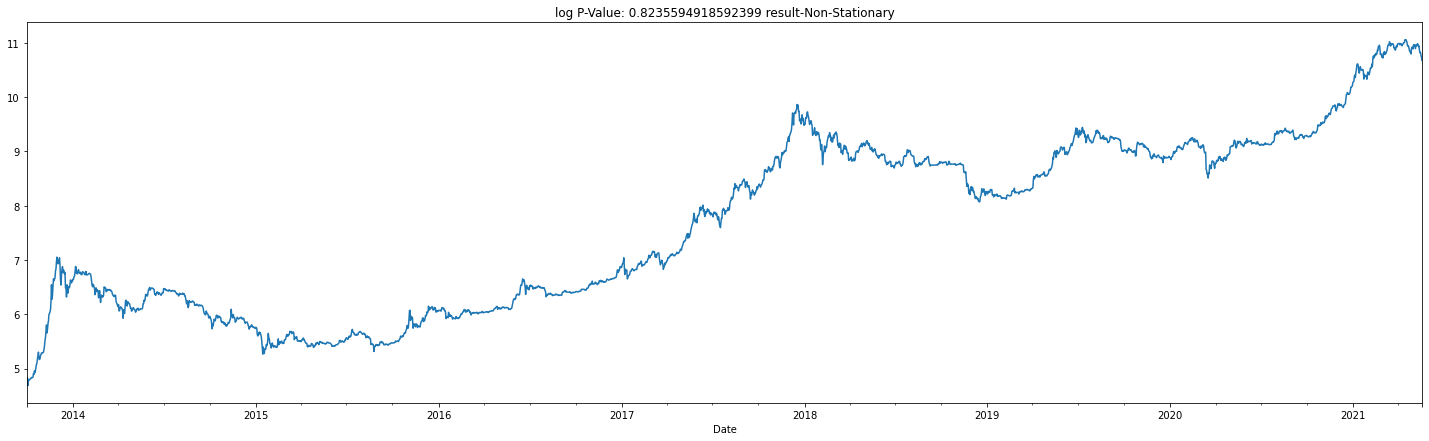

In [63]:
df['LogClosing Price (USD)'].plot(figsize=(25, 7))
plt.title('log P-Value: 0.8235594918592399 result-Non-Stationary')

In [64]:
adf(df['LogClosing Price (USD)'])

Test-Statistic: -0.7847540110858979
P-Value: 0.8235594918592399
Non-Stationary


In [65]:
df['Diff'] = df['Closing Price (USD)'].diff()

Text(0.5, 1.0, ' differencing P-Value: 7.43244880436651e-12 result-Stationary')

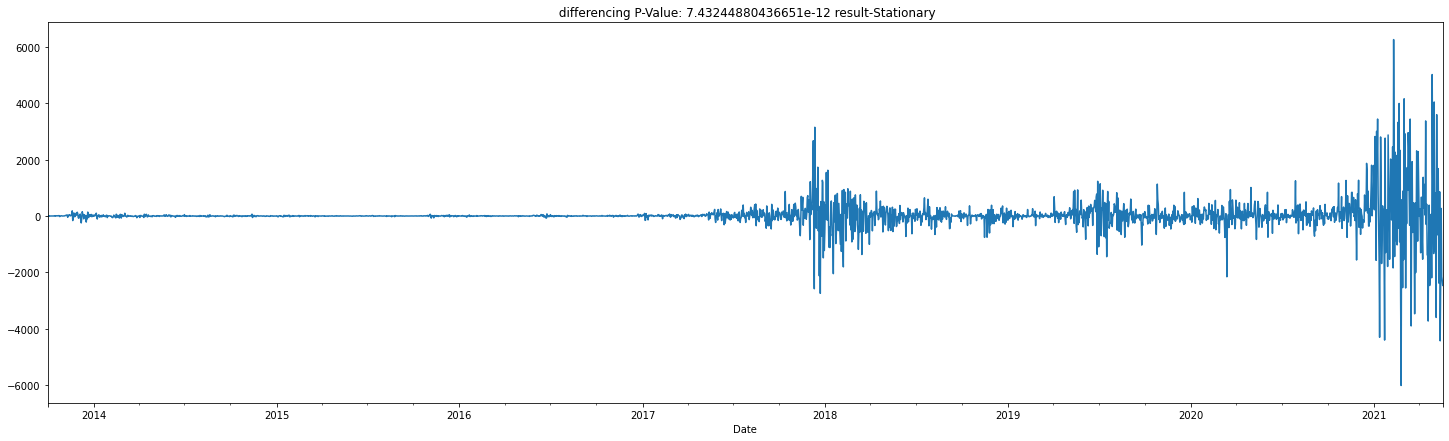

In [66]:
df['Diff'].plot(figsize=(25, 7))
plt.title(' differencing P-Value: 7.43244880436651e-12 result-Stationary')

In [67]:
adf(df['Diff'].dropna())

Test-Statistic: -7.802415807861574
P-Value: 7.43244880436651e-12
Stationary


In [68]:
df['DiffLog'] = df['LogClosing Price (USD)'].diff()

Text(0.5, 1.0, 'Logdifferencing P-Value: 5.233696757120254e-26 result-Stationary')

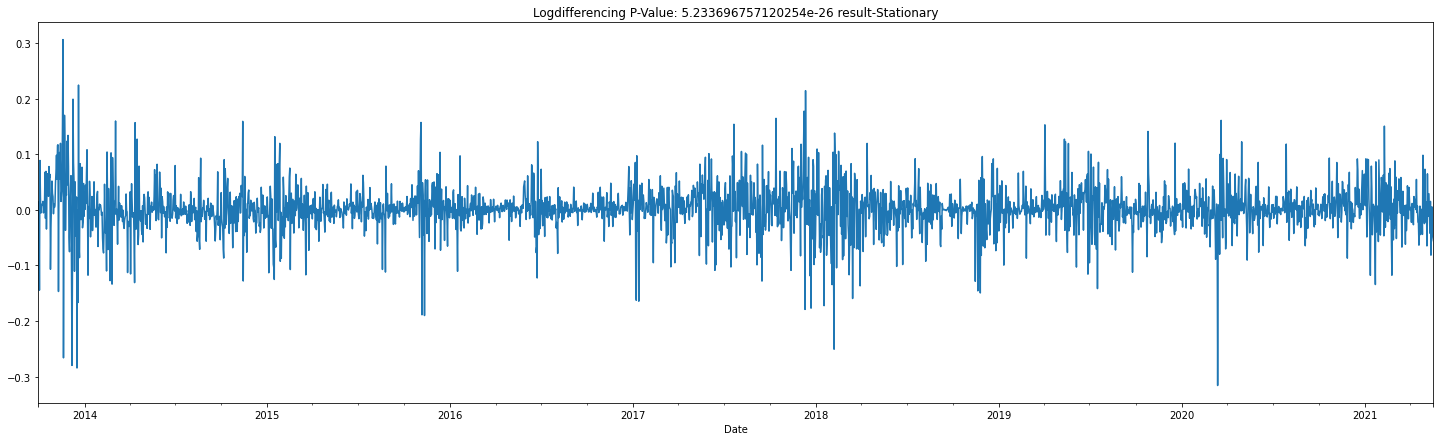

In [69]:
df['DiffLog'].plot(figsize=(25, 7))
plt.title('Logdifferencing P-Value: 5.233696757120254e-26 result-Stationary')

In [70]:
adf(df['DiffLog'].dropna())

Test-Statistic: -13.923977330641463
P-Value: 5.233696757120254e-26
Stationary
